### 유튜브 페이지에 접속해서 원하는 검색어를 입력 후 검색된 페이지 내에서 조건에 맞는 수집시스템 구축

In [1]:
!pip install selenium
!pip install -U selenium

# 웹 드라이버를 자동으로 관리하고 업데이트 해주는 python 라이브러리
!pip install webdriver_manager

In [4]:
import pandas as pd

from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup as bs

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.support.ui import WebDriverWait
# WebDriverWait : 특정 조건이 충족될 때까지 기다리는데 사용하는 모듈
from selenium.webdriver.support import expected_conditions as EC
# EC : WebDriverWait가 기다리는 조건을 정의하는데 사용하는 모듈

In [50]:
s = Service(ChromeDriverManager().install())
driver = wb.Chrome(service = s)   # 크롬드라이버가 업데이트될 수 있도록

In [51]:
# 유튜브 검색 키워드 입력
keyword = input('유튜브 검색어를 입력하세요 >> ')
url = f'https://www.youtube.com/results?search_query={keyword}'
driver.get(url)

유튜브 검색어를 입력하세요 >> 소녀시대 뮤비


In [52]:
names = driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string.style-scope.ytd-video-renderer')

for i in names : 
    print(i.text)

# 유튜브 제목만 출력된게 아니다!
# 페이지를 잘 살펴보면, class값을 여러태그들이 지니고 있다.
# 다른 방법을 사용해야 하겠다!

Girls' Generation 소녀시대 'The Boys' MV (KOR Ver.)


Girls' Generation 소녀시대 'The Boys' MV (KOR Ver.) ℗ S.M.Entertainment.
Girls' Generation 소녀시대 'FOREVER 1' MV


[Tracklist] 01 FOREVER 1 02 Lucky Like That 03 Seventeen 04 Villain 05 You Better Run 06 Closer 07 Mood Lamp 08 완벽한 ...
GIRL GENERATION 少女时代 (소녀시대) MV PLAYLIST 뮤비 모음 22곡 (2007 - 2018)


00:00 몰랐니 (Lil' Touch) 03:29 Holiday 06:54 그 여름 (0805) 11:14 YOU THINK 14:32 Lion Heart 19:42 Party 23:20 Catch Me If ...
Girls' Generation 소녀시대 'Lion Heart' MV


#소녀시대 #GIRLSGENERATION #GG #SNSD #LionHeart #YouThink #Release #150818 Girls' Generation Official ...
Girls' Generation 소녀시대 'Holiday' MV


[Tracklist] 01 Girls Are Back 02 All Night 03 Holiday 04 FAN 05 Only One 06 One Last Time 07 Sweet Talk 08 Love Is Bitter 09 ...
Girls' Generation-Oh!GG 소녀시대-Oh!GG '몰랐니 (Lil' Touch)' MV


[Tracklist] 01 몰랐니 (Lil' Touch) 02 쉼표 (Fermata) 03 몰랐니 (Lil' Touch) (Inst.) 04 쉼표 (Fermata) (Inst.) Girls' Generation-Oh!GG ...
Girls' Generation 소녀시대 '소원을 말해봐 (Gen

In [53]:
# a태그에 감싸져 있다 -> a태그와 클래스까지 활용
# url 수집
# 같은 id를 가진 a태그가 여러개 존재한다?  --> id가 지금 class처럼 사용됨
video_url = driver.find_elements(By.CSS_SELECTOR,'a#video-title')
# 유튜브에 있는 영상 하나하나가 전부 다른 서버에 존재하기 때문에
for i in video_url : 
    print(i.get_attribute('href'))

https://www.youtube.com/watch?v=6pA_Tou-DPI&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=Qpf26PtBXgo&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=XH_E7J4SsEk&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=nVCubhQ454c&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=YwN-CN9EjTg&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=SdzLl-XpJt0&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=6SwiSpudKWI&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=rJGsFVXCYEw&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=yek5-9nS4Ak&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=x-ZV6ZXvsyk&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=C5CUnbqBuEI&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5hA%3D%3D
https://www.youtube.com/watch?v=TGbwL8kSpEk&pp=ygUT7IaM64WA7Iuc64yAIOuupOu5h

In [54]:
len(names), len(video_url)
# names랑 video_url의 길이가 다르다 -> 수집 방법에 차이가 존재!

(94, 24)

In [55]:
names = driver.find_elements(By.CSS_SELECTOR,'a#video-title>yt-formatted-string.style-scope.ytd-video-renderer')
for i in names : 
    print(i.text)

Girls' Generation 소녀시대 'The Boys' MV (KOR Ver.)
Girls' Generation 소녀시대 'FOREVER 1' MV
GIRL GENERATION 少女时代 (소녀시대) MV PLAYLIST 뮤비 모음 22곡 (2007 - 2018)
Girls' Generation 소녀시대 'Lion Heart' MV
Girls' Generation 소녀시대 'Holiday' MV
Girls' Generation-Oh!GG 소녀시대-Oh!GG '몰랐니 (Lil' Touch)' MV
Girls' Generation 소녀시대 '소원을 말해봐 (Genie)' MV
우크라이나 전황(3/18)- 우, 트란스니스트리아 헬기 공격/우크라 드론 공격 능력 치명적/푸틴, 5선 당선의 의미/루마니아에 1만명 나토 기지 건설/수미,하르키우 주민들 대피
소녀시대 노래모음 38곡, ♬보고듣는 소울뮤직TV
3편을 이어서 한방에 몰아보기../민담/옛날이야기
[띵곡열전📣] 소녀시대 히트곡 모음.ZIP
Girls' Generation 소녀시대 'Oh!' MV
Girls' Generation 소녀시대 'PARTY' MV
[#가수모음zip] 소녀시대 모음.zip (Girls' Generation Stage Compilation) | KBS 방송
Girls' Generation 소녀시대 'Mr.Mr.' MV
Girls' Generation 소녀시대 'Gee' MV
Girls' Generation 소녀시대 '훗 (Hoot)' MV
Girls' Generation 소녀시대 '소녀시대 (Girls' Generation)' MV
Girls' Generation 소녀시대 '힘 내! (Way To Go)' MV
[Playlist] This is BLACKPINK 🖤💗 | 블랙핑크 노래 모음 | BLACKPINK essential;
2NE1 노래 모음 BEST 34곡, 보고듣는 소울뮤직 TV
Red Velvet (레드벨벳)의 킬링보이스를 라이브로!ㅣ행복 (Happiness), Chill K

In [56]:
len(names), len(video_url)

(24, 24)

In [57]:
n_lst = []
u_lst = []
# 반복문 사용해서 이름, url을 리스트에 집어넣기
for i in range(len(names)) : 
    names_ = names[i].text
    url_ = video_url[i].text
    n_lst.append(names_)
    u_lst.append(url_)

In [58]:
n_lst

["Girls' Generation 소녀시대 'The Boys' MV (KOR Ver.)",
 "Girls' Generation 소녀시대 'FOREVER 1' MV",
 'GIRL GENERATION 少女时代 (소녀시대) MV PLAYLIST 뮤비 모음 22곡 (2007 - 2018)',
 "Girls' Generation 소녀시대 'Lion Heart' MV",
 "Girls' Generation 소녀시대 'Holiday' MV",
 "Girls' Generation-Oh!GG 소녀시대-Oh!GG '몰랐니 (Lil' Touch)' MV",
 "Girls' Generation 소녀시대 '소원을 말해봐 (Genie)' MV",
 '우크라이나 전황(3/18)- 우, 트란스니스트리아 헬기 공격/우크라 드론 공격 능력 치명적/푸틴, 5선 당선의 의미/루마니아에 1만명 나토 기지 건설/수미,하르키우 주민들 대피',
 '소녀시대 노래모음 38곡, ♬보고듣는 소울뮤직TV',
 '3편을 이어서 한방에 몰아보기../민담/옛날이야기',
 '[띵곡열전📣] 소녀시대 히트곡 모음.ZIP',
 "Girls' Generation 소녀시대 'Oh!' MV",
 "Girls' Generation 소녀시대 'PARTY' MV",
 "[#가수모음zip] 소녀시대 모음.zip (Girls' Generation Stage Compilation) | KBS 방송",
 "Girls' Generation 소녀시대 'Mr.Mr.' MV",
 "Girls' Generation 소녀시대 'Gee' MV",
 "Girls' Generation 소녀시대 '훗 (Hoot)' MV",
 "Girls' Generation 소녀시대 '소녀시대 (Girls' Generation)' MV",
 "Girls' Generation 소녀시대 '힘 내! (Way To Go)' MV",
 '[Playlist] This is BLACKPINK 🖤💗 | 블랙핑크 노래 모음 | BLACKPINK essential;',
 '2NE1 노래

In [59]:
# 선생님풀이
# 반복문 사용해서 이름, url을 리스트에 집어넣기
n_lst = []
u_lst = []
for n in names :   # 유튜브 영상 제목
    n_lst.append(n.text)
    
for u in video_url :  # 유튜브 영상 링크(url)
    u_lst.append(u.get_attribute('href'))

In [60]:
# 영상의 제목과 링크가 너무 길다 -> 컬럼의 너비 제한 없애기
pd.set_option('display.max_colwidth', None)

In [47]:
dic = {'영상이름' : n_lst, '링크' : u_lst}
y_df = pd.DataFrame(dic)
# y_df

,영상이름,링크
0,FOREVER 1 - 소녀시대 (GIRLS’ GENERATION) [뮤직뱅크/Music Bank] | KBS 220819 방송,https://www.youtube.com/watch?v=06IJM0r4IQc&pp=ygUM7IaM64WA7Iuc64yA
1,Girls' Generation 소녀시대 'FOREVER 1' MV,https://www.youtube.com/watch?v=Qpf26PtBXgo&pp=ygUM7IaM64WA7Iuc64yA
2,[𝗣𝗹𝗮𝘆𝗹𝗶𝘀𝘁] 연도별 소녀시대 히트곡 모음💿 | 𝑮𝒊𝒓𝒍𝒔' 𝑮𝒆𝒏𝒆𝒓𝒂𝒕𝒊𝒐𝒏 𝑯𝒊𝒕 𝑺𝒐𝒏𝒈𝒔,https://www.youtube.com/watch?v=pBya-rkceD0&pp=ygUM7IaM64WA7Iuc64yA
3,"소녀시대 노래모음 38곡, ♬보고듣는 소울뮤직TV",https://www.youtube.com/watch?v=yek5-9nS4Ak&pp=ygUM7IaM64WA7Iuc64yA
4,[Kpop] 소녀시대 히트곡 명곡 모음,https://www.youtube.com/watch?v=iyEGBVNynn0&pp=ygUM7IaM64WA7Iuc64yA
5,"[Comeback Stage] Girls' Generation - Lion Heart, 소녀시대 - 라이온 하트 Show Music core 20150822",https://www.youtube.com/watch?v=APafAyReBYI&pp=ygUM7IaM64WA7Iuc64yA
6,"한동훈 사퇴? 난리났다!! ""비대위원장 관둬 XX""... 용산 메시지 충격!! 조중동 분위기를 보니 설마? 정보지글에 돌던 썰이 실화였다ㄷㄷㄷ",https://www.youtube.com/watch?v=t6U_CAP4nF8&pp=ygUM7IaM64WA7Iuc64yA
7,"[시선집중] 재경선 결과 발표 후 박용진 의원이 먼저 전화, 협력할 것... 밀알 논란은 정치언어에 미숙한 탓 - 조수진 더불어민주당 서울 강북을 후보, MBC 240320 방송",https://www.youtube.com/watch?v=RYLw47ee-a0&pp=ygUM7IaM64WA7Iuc64yA
8,𝑝𝑙𝑎𝑦𝑙𝐼𝑠𝑡 💝 소원PICK 수록곡 맛집 소녀시대의 앨범별 띵곡 20선,https://www.youtube.com/watch?v=QMkKhPqBH8w&pp=ygUM7IaM64WA7Iuc64yA
9,G I R L S G E N E R A T I O N Best Songs Playlist （2023 updated) audio,https://www.youtube.com/watch?v=VeRgKuko6-k&pp=ygUM7IaM64WA7Iuc64yA


In [61]:
driver.quit()

###  워드 클라우드

In [62]:
y_df.to_csv('유튜브데이터.csv')

In [63]:
f = open('유튜브데이터.csv', 'r', encoding='utf-8')
data = f.read()
f.close()

# print(data)

,영상이름,링크
0,FOREVER 1 - 소녀시대 (GIRLS’ GENERATION) [뮤직뱅크/Music Bank] | KBS 220819 방송,https://www.youtube.com/watch?v=06IJM0r4IQc&pp=ygUM7IaM64WA7Iuc64yA
1,Girls' Generation 소녀시대 'FOREVER 1' MV,https://www.youtube.com/watch?v=Qpf26PtBXgo&pp=ygUM7IaM64WA7Iuc64yA
2,[𝗣𝗹𝗮𝘆𝗹𝗶𝘀𝘁] 연도별 소녀시대 히트곡 모음💿 | 𝑮𝒊𝒓𝒍𝒔' 𝑮𝒆𝒏𝒆𝒓𝒂𝒕𝒊𝒐𝒏 𝑯𝒊𝒕 𝑺𝒐𝒏𝒈𝒔,https://www.youtube.com/watch?v=pBya-rkceD0&pp=ygUM7IaM64WA7Iuc64yA
3,"소녀시대 노래모음 38곡, ♬보고듣는 소울뮤직TV",https://www.youtube.com/watch?v=yek5-9nS4Ak&pp=ygUM7IaM64WA7Iuc64yA
4,[Kpop] 소녀시대 히트곡 명곡 모음,https://www.youtube.com/watch?v=iyEGBVNynn0&pp=ygUM7IaM64WA7Iuc64yA
5,"[Comeback Stage] Girls' Generation - Lion Heart, 소녀시대 - 라이온 하트 Show Music core 20150822",https://www.youtube.com/watch?v=APafAyReBYI&pp=ygUM7IaM64WA7Iuc64yA
6,"한동훈 사퇴? 난리났다!! ""비대위원장 관둬 XX""... 용산 메시지 충격!! 조중동 분위기를 보니 설마? 정보지글에 돌던 썰이 실화였다ㄷㄷㄷ",https://www.youtube.com/watch?v=t6U_CAP4nF8&pp=ygUM7IaM64WA7Iuc64yA
7,"[시선집중] 재경선 결과 발표 후 박용진 의원이 먼저 전화, 협력할 것... 밀알 논란은 정치언어에 미숙한 탓 - 조수진 더불어민주당 서울 강북을 후보, MBC 240320 방송",http

In [64]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 667.8 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [65]:
!pip install konlpy

  Obtaining dependency information for konlpy from https://files.pythonhosted.org/packages/5a/95/896914d9461c12f07e6f8afb1f7462e28395fc46b54fcbb96f1ea3cff8fb/konlpy-0.6.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for JPype1>=0.7.0 from https://files.pythonhosted.org/packages/1f/19/144f3a767b563ba5c6d4aa534ea1f3fad9a5067c3917df4458a6e1afe0ef/JPype1-1.5.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB 487.6 kB/s eta 0:00:40
   ---------------------------------------- 0.2/19.4 MB 1.7 MB/s eta 0:00:12
    --------------------------------------- 0.4/19.4 MB 2.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/19.4 MB 2.6 MB/s eta 0:00:08
   - -------------------------------------- 0.7/19.4 MB 2.8 MB/s eta 0:00:07
   -- ------------------------------------- 1.1/19.4 MB 3.7

```python
# 형용사 단위로 한글을 쪼개주는 것 (꼬꼬마) -> 머신러닝에서 배울것
from konlpy.tag import Kkma

kkma = Kkma()

kkma.nouns(data)
```

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [71]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/batang.ttc',
               background_color = 'white',
               colormap = 'Dark2').generate(data)
wc.words_

{'https': 1.0,
 'youtube': 1.0,
 'watch v': 1.0,
 'pp ygUM7IaM64WA7Iuc64yA': 1.0,
 '소녀시대': 0.7096774193548387,
 "Girls' Generation": 0.22580645161290322,
 '방송': 0.16129032258064516,
 '모음': 0.16129032258064516,
 'Music Core': 0.12903225806451613,
 'SNL 코리아': 0.12903225806451613,
 '코리아 시즌5': 0.12903225806451613,
 '편 하이라이트': 0.12903225806451613,
 '쿠팡플레이 쿠팡': 0.12903225806451613,
 'FOREVER': 0.0967741935483871,
 'Stage': 0.0967741935483871,
 'E': 0.0967741935483871,
 'Oh': 0.0967741935483871,
 'GIRLS': 0.06451612903225806,
 'Generation': 0.06451612903225806,
 'KBS': 0.06451612903225806,
 'MV': 0.06451612903225806,
 '히트곡': 0.06451612903225806,
 '보고듣는': 0.06451612903225806,
 'Show': 0.06451612903225806,
 '후': 0.06451612903225806,
 'G': 0.06451612903225806,
 'N': 0.06451612903225806,
 'Best': 0.06451612903225806,
 '박지환': 0.06451612903225806,
 '이유미': 0.06451612903225806,
 'IeHg2m4dPJg': 0.06451612903225806,
 'Compilation': 0.06451612903225806,
 'JTBC': 0.06451612903225806,
 '외': 0.064516129032

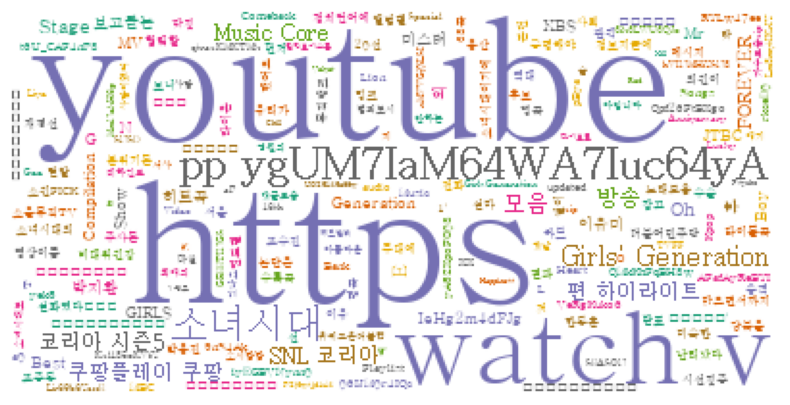

In [73]:
plt.figure(figsize = (12,5))  # 워드클라우드 크기 설정
plt.axis('off')    # x,y값의 선을 보이지 않도록!
plt.imshow(wc)     # 워드클라우드를 이미지로 보여주겠다
plt.savefig('./워드클라우드결과.jpg')  # 이미지 결과 저장